**Nama Kelompok :** Mandalika

**Anggota :**
1. Ardilla Safitri
2. Jonse Kennedy
3. Fakhry Husnul
4. Lise Listianti
5. Riska Diah N
6. Arni Cici Suryani

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
# informasi general tentang dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Statistical Summary

In [4]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

In [5]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [6]:
# categorical columns 
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


# Missing Data

In [7]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

jumlah data yang missing values cukup besar dengan jumlah data yang tidak besar sehingga kita menggunakan strategi imputasi dengan asumsi sebagai berikut:
* `Tenure` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `WarehouseToHome` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `HourSpendOnApp` \: impute dengan nilai modus
* `OrderAmountHikeFromlastYear` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `CouponUsed` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `OrderCount` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)
* `DaySinceLastOrder` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya skewed)

In [8]:
# impute Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, dan DaySinceLastOrder
df['Tenure'].fillna(df['Tenure'].median(), inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(), inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(), inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

In [9]:
# Impute HourSpendOnApp dengan modus
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mode()[0], inplace=True)

In [10]:
# cek jumlah missing data setelah preprocessing
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

# Duplicated Data

In [11]:
# cek jumlah duplicated rows dari semua kolom
df.duplicated().sum()

0

`Tidak terdapat data yang duplicate`

# Outliers Handling

Pengamatan:
* `Tenure` \: dihapus
* `WarehouseToHome` \: tidak perlu dihapus
* `HourSpendOnApp` \: tidak perlu dihapus
* `NumberOfDeviceRegistered` \: tidak perlu dihapus
* `NumberOfAddress` \: dihapus
* `OrderAmountHikeFromlastYear` \: tidak perlu dihapus
* `CouponUsed` \: tidak perlu dihapus
* `OrderCount` \: tidak perlu dihapus
* `DaySinceLastOrder` \: tidak perlu dihapus
* `CashbackAmount` \: tidak perlu dihapus

In [12]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Tenure', 'NumberOfAddress']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries] 

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5622


# Feature Transformation

1. Log transformation: `Tenure`, `WarehouseToHome`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, dan `DaySinceLastOrder` 
2. Standardization: `HourSpendApp`, `NumberOfDeviceRegistered `, `SatisfactionScore`, dan  `CashbackAmount`

Namun `Tenure`, `CouponUsed`, `DaySinceLastOrder` memiliki data bernilai nol, maka akan dilakukan penambahan nilai setengah dari nilai terkecil selain nol.

In [13]:
df['Tenure']= df['Tenure']+0.5
df['CouponUsed']= df['CouponUsed']+0.5
df['DaySinceLastOrder']= df['DaySinceLastOrder']+0.5

# Log/Exp Transformation

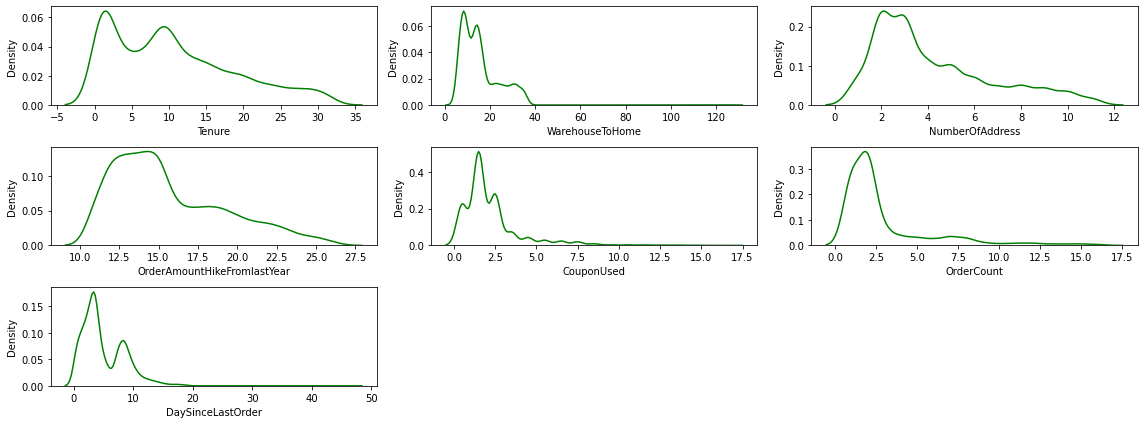

In [14]:
#distribusi nilai asli
features = ['Tenure','WarehouseToHome','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount', 'DaySinceLastOrder']
plt.figure(figsize=(16, 6))
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

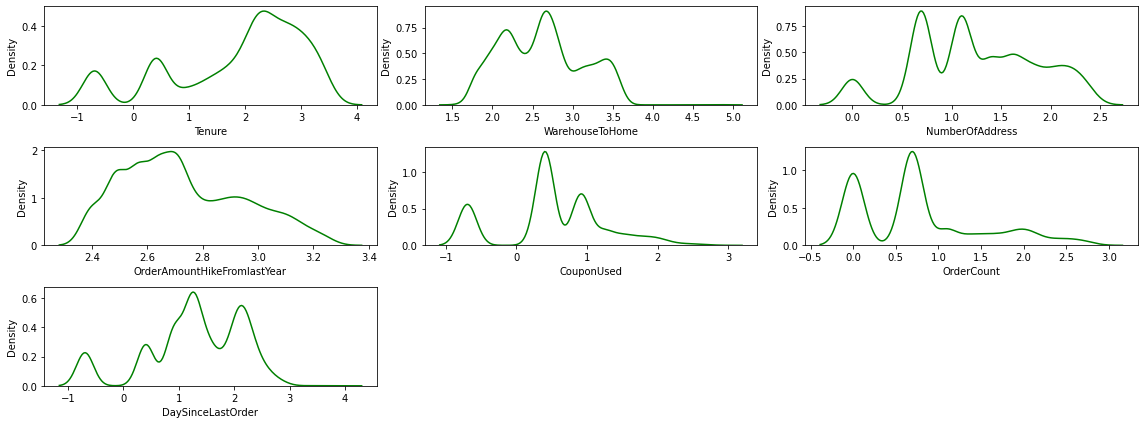

In [15]:
# distribusi gaji (setelah log transformation)
plt.figure(figsize=(16, 6))
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=np.log(df[features[i]]), color='green')
    plt.xlabel(features[i])
    plt.tight_layout()
# lebih mendekati distribusi normal!

In [16]:
# kita tranformasi
df['Tenure'] = np.log(df['Tenure'])
df['WarehouseToHome'] = np.log(df['WarehouseToHome'])
df['NumberOfAddress'] = np.log(df['NumberOfAddress'])
df['OrderAmountHikeFromlastYear'] = np.log(df['OrderAmountHikeFromlastYear'])
df['CouponUsed'] = np.log(df['CouponUsed'])
df['OrderCount'] = np.log(df['OrderCount'])
df['DaySinceLastOrder'] = np.log(df['DaySinceLastOrder'])

# Normalization/Standardization

In [17]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000
mean,52815.866418,0.168268,1.875704,1.654927,2.616845,2.934187,3.689968,3.067592,1.254831,0.284596,2.727294,0.527959,0.776407,1.294747,177.201853
std,1625.260979,0.374137,1.179605,0.915439,0.501227,0.705488,1.023702,1.380366,0.611662,0.451262,0.217625,0.735542,0.725769,0.868645,49.185508
min,50001.000000,0.000000,-0.693147,1.000000,1.609438,0.000000,1.000000,1.000000,0.000000,0.000000,2.397895,-0.693147,0.000000,-0.693147,0.000000
25%,51409.250000,0.000000,1.252763,1.000000,2.197225,2.000000,3.000000,2.000000,0.693147,0.000000,2.564949,0.405465,0.000000,0.916291,145.755000
50%,52815.500000,0.000000,2.251292,1.000000,2.639057,3.000000,4.000000,3.000000,1.098612,0.000000,2.708050,0.405465,0.693147,1.252763,163.230000
75%,54223.750000,0.000000,2.740840,3.000000,2.995732,3.000000,4.000000,4.000000,1.791759,1.000000,2.890372,0.916291,1.098612,2.014903,196.392500
max,55630.000000,1.000000,3.449988,3.000000,4.844187,5.000000,6.000000,5.000000,2.397895,1.000000,3.258097,2.803360,2.772589,3.839452,324.990000


In [18]:
from sklearn.preprocessing import StandardScaler

#standarisasi (karena distribusi datanya sudah mendekati normal)
df['HourSpendOnApp'] = StandardScaler().fit_transform(df['HourSpendOnApp'].values.reshape(len(df), 1))
df['NumberOfDeviceRegistered'] = StandardScaler().fit_transform(df['NumberOfDeviceRegistered'].values.reshape(len(df), 1))
df['SatisfactionScore'] = StandardScaler().fit_transform(df['SatisfactionScore'].values.reshape(len(df), 1))
df['CashbackAmount_std'] = StandardScaler().fit_transform(df['CashbackAmount'].values.reshape(len(df), 1))

In [19]:
# cek keberhasilan feature transformation
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CashbackAmount_std
count,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5.622000e+03,5.622000e+03,5.622000e+03,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5622.000000,5.622000e+03
mean,52815.866418,0.168268,1.875704,1.654927,2.616845,1.415984e-14,5.875098e-15,5.766329e-16,1.254831,0.284596,2.727294,0.527959,0.776407,1.294747,177.201853,-1.451317e-16
std,1625.260979,0.374137,1.179605,0.915439,0.501227,1.000089e+00,1.000089e+00,1.000089e+00,0.611662,0.451262,0.217625,0.735542,0.725769,0.868645,49.185508,1.000089e+00
min,50001.000000,0.000000,-0.693147,1.000000,1.609438,-4.159457e+00,-2.627921e+00,-1.497990e+00,0.000000,0.000000,2.397895,-0.693147,0.000000,-0.693147,0.000000,-3.603045e+00
25%,51409.250000,0.000000,1.252763,1.000000,2.197225,-1.324289e+00,-6.740530e-01,-7.734806e-01,0.693147,0.000000,2.564949,0.405465,0.000000,0.916291,145.755000,-6.394089e-01
50%,52815.500000,0.000000,2.251292,1.000000,2.639057,9.329528e-02,3.028808e-01,-4.897078e-02,1.098612,0.000000,2.708050,0.405465,0.693147,1.252763,163.230000,-2.840897e-01
75%,54223.750000,0.000000,2.740840,3.000000,2.995732,9.329528e-02,3.028808e-01,6.755391e-01,1.791759,1.000000,2.890372,0.916291,1.098612,2.014903,196.392500,3.902034e-01
max,55630.000000,1.000000,3.449988,3.000000,4.844187,2.928463e+00,2.256748e+00,1.400049e+00,2.397895,1.000000,3.258097,2.803360,2.772589,3.839452,324.990000,3.004976e+00


# Feature Encoding

In [20]:
cats_updated = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column PreferredLoginDevice
Mobile Phone    2762
Computer        1630
Phone           1230
Name: PreferredLoginDevice, dtype: int64
------------------------------ 

value counts of column PreferredPaymentMode
Debit Card          2308
Credit Card         1501
E wallet             614
UPI                  414
COD                  363
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64
------------------------------ 

value counts of column Gender
Male      3378
Female    2244
Name: Gender, dtype: int64
------------------------------ 

value counts of column PreferedOrderCat
Laptop & Accessory    2046
Mobile Phone          1270
Fashion                826
Mobile                 808
Grocery                408
Others                 264
Name: PreferedOrderCat, dtype: int64
------------------------------ 

value counts of column MaritalStatus
Married     2984
Single      1792
Divorced     846
Name: MaritalStatus, dtype: int64
------------

Data tidak sesuai (Mobile Phone = Phone, Credit Card = CC, dan COD = Cash on Delivery, Mobile Phone=Mobile) akan di rename

In [21]:
df['PreferredLoginDevice'].replace(['Phone'], 'Mobile Phone', inplace=True)
df['PreferredPaymentMode'].replace(['CC'], 'Credit Card', inplace=True)
df['PreferredPaymentMode'].replace(['Cash on Delivery'], 'COD', inplace=True)
df['PreferedOrderCat'].replace(['Mobile'], 'Mobile Phone', inplace=True)

In [22]:
#cek ulang setelah rename
cats_updated = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']

for col in cats_updated:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column PreferredLoginDevice
Mobile Phone    3992
Computer        1630
Name: PreferredLoginDevice, dtype: int64
------------------------------ 

value counts of column PreferredPaymentMode
Debit Card     2308
Credit Card    1774
E wallet        614
COD             512
UPI             414
Name: PreferredPaymentMode, dtype: int64
------------------------------ 

value counts of column Gender
Male      3378
Female    2244
Name: Gender, dtype: int64
------------------------------ 

value counts of column PreferedOrderCat
Mobile Phone          2078
Laptop & Accessory    2046
Fashion                826
Grocery                408
Others                 264
Name: PreferedOrderCat, dtype: int64
------------------------------ 

value counts of column MaritalStatus
Married     2984
Single      1792
Divorced     846
Name: MaritalStatus, dtype: int64
------------------------------ 



Strategi encoding 
* `PreferredLoginDevice`,, `Gender`, & `MaritalStatus`  \: label encoding
*  `PreferredPaymentMode` & `PreferredOrderCat` \: one hot encoding

In [23]:
mapping_LoginDevice = {
    'Mobile Phone' : 0,
    'Computer' : 1
}

mapping_MaritalStatus = {
    'Married' : 0,
    'Single' : 1,
    'Divorced' : 2
}

mapping_Gender = {
    'Male' : 0,
    'Female' : 1
}

df['PreferredLoginDevice'] = df['PreferredLoginDevice'].map(mapping_LoginDevice)
df['MaritalStatus'] = df['MaritalStatus'].map(mapping_MaritalStatus)
df['Gender'] = df['Gender'].map(mapping_Gender)  

In [24]:
for cat in ['PreferredPaymentMode', 'PreferedOrderCat']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [25]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,PreferredPaymentMode_COD,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
0,50001,1,1.504077,0,3,1.791759,Debit Card,1,0.093295,-0.674053,...,0,0,1,0,0,0,0,1,0,0
1,50002,1,2.251292,0,1,2.079442,UPI,0,0.093295,0.302881,...,0,0,0,0,1,0,0,0,1,0
2,50003,1,2.251292,0,1,3.401197,Debit Card,0,-1.324289,0.302881,...,0,0,1,0,0,0,0,0,1,0
3,50004,1,-0.693147,0,3,2.708050,Debit Card,0,-1.324289,0.302881,...,0,0,1,0,0,0,0,1,0,0
4,50005,1,-0.693147,0,1,2.484907,Credit Card,0,0.093295,-0.674053,...,0,1,0,0,0,0,0,0,1,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5622 entries, 0 to 5629
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CustomerID                           5622 non-null   int64  
 1   Churn                                5622 non-null   int64  
 2   Tenure                               5622 non-null   float64
 3   PreferredLoginDevice                 5622 non-null   int64  
 4   CityTier                             5622 non-null   int64  
 5   WarehouseToHome                      5622 non-null   float64
 6   PreferredPaymentMode                 5622 non-null   object 
 7   Gender                               5622 non-null   int64  
 8   HourSpendOnApp                       5622 non-null   float64
 9   NumberOfDeviceRegistered             5622 non-null   float64
 10  PreferedOrderCat                     5622 non-null   object 
 11  SatisfactionScore             

Semua kolom sudah bertipe numerical(float dan integer)

# Feature Engineering

# Feature Selection

* Beberapa *feature* memiliki korelasi lemah dengan *target*, mereka akan dipakai (`Complain`, `SatisfactionScore`, `NumberDeviceRegistered`, `CashbackAmount`, `DaySinceLastOrder`, dan `Tenure`)
* Beberapa *feature* terlihat sama sekali tidak berkorelasi, mereka sebaiknya diabaikan (`OrderCount` & `CouponUsed`, `Tenure` & `CashbackAmount`, `DaySinceLastOrder` & `OrderCount`)

In [27]:
# drop kolom yang yang tidak relevan
df = df.drop(columns=['CustomerID','PreferredLoginDevice', 'PreferedOrderCat', 'PreferredPaymentMode'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5622 entries, 0 to 5629
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5622 non-null   int64  
 1   Tenure                               5622 non-null   float64
 2   CityTier                             5622 non-null   int64  
 3   WarehouseToHome                      5622 non-null   float64
 4   Gender                               5622 non-null   int64  
 5   HourSpendOnApp                       5622 non-null   float64
 6   NumberOfDeviceRegistered             5622 non-null   float64
 7   SatisfactionScore                    5622 non-null   float64
 8   MaritalStatus                        5622 non-null   int64  
 9   NumberOfAddress                      5622 non-null   float64
 10  Complain                             5622 non-null   int64  
 11  OrderAmountHikeFromlastYear   

# Feature Extraction

In [29]:
df['OtherRevenue']= df['CashbackAmount']/0.05
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5622 entries, 0 to 5629
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5622 non-null   int64  
 1   Tenure                               5622 non-null   float64
 2   CityTier                             5622 non-null   int64  
 3   WarehouseToHome                      5622 non-null   float64
 4   Gender                               5622 non-null   int64  
 5   HourSpendOnApp                       5622 non-null   float64
 6   NumberOfDeviceRegistered             5622 non-null   float64
 7   SatisfactionScore                    5622 non-null   float64
 8   MaritalStatus                        5622 non-null   int64  
 9   NumberOfAddress                      5622 non-null   float64
 10  Complain                             5622 non-null   int64  
 11  OrderAmountHikeFromlastYear   

In [30]:
df.duplicated().sum()

559

In [31]:
print(f'Jumlah row duplicated sebelum dihapus {df.duplicated().sum()}')
df.drop_duplicates(inplace=True) # note: default-nya keep='First' (tidak perlu ditulis)
print(f'Jumlah row duplicated SETELAH dihapus {df.duplicated().sum()}')

Jumlah row duplicated sebelum dihapus 559
Jumlah row duplicated SETELAH dihapus 0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5063 entries, 0 to 5629
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5063 non-null   int64  
 1   Tenure                               5063 non-null   float64
 2   CityTier                             5063 non-null   int64  
 3   WarehouseToHome                      5063 non-null   float64
 4   Gender                               5063 non-null   int64  
 5   HourSpendOnApp                       5063 non-null   float64
 6   NumberOfDeviceRegistered             5063 non-null   float64
 7   SatisfactionScore                    5063 non-null   float64
 8   MaritalStatus                        5063 non-null   int64  
 9   NumberOfAddress                      5063 non-null   float64
 10  Complain                             5063 non-null   int64  
 11  OrderAmountHikeFromlastYear   

In [33]:
# drop kolom yang yang tidak relevan
df = df.drop(columns=['OtherRevenue', 'CashbackAmount'])

# Split Data

In [34]:
X = df[['Tenure', 'CityTier', 'Gender','WarehouseToHome','NumberOfDeviceRegistered','SatisfactionScore', 'Complain','DaySinceLastOrder','CashbackAmount_std', 
        'HourSpendOnApp', 'NumberOfAddress', 'OrderAmountHikeFromlastYear','CouponUsed','OrderCount', 'PreferredPaymentMode_COD','PreferredPaymentMode_Credit Card',
        'PreferredPaymentMode_Debit Card','PreferredPaymentMode_E wallet','PreferredPaymentMode_UPI', 
        'MaritalStatus', 'PreferedOrderCat_Fashion','PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory','PreferedOrderCat_Mobile Phone','PreferedOrderCat_Others']]
y = df[['Churn']]

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
Xtr, Xtest, ytr, ytest = train_test_split(X,y,test_size=0.3, random_state=123)

In [35]:
Xtr.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3544 entries, 257 to 3869
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tenure                               3544 non-null   float64
 1   CityTier                             3544 non-null   int64  
 2   Gender                               3544 non-null   int64  
 3   WarehouseToHome                      3544 non-null   float64
 4   NumberOfDeviceRegistered             3544 non-null   float64
 5   SatisfactionScore                    3544 non-null   float64
 6   Complain                             3544 non-null   int64  
 7   DaySinceLastOrder                    3544 non-null   float64
 8   CashbackAmount_std                   3544 non-null   float64
 9   HourSpendOnApp                       3544 non-null   float64
 10  NumberOfAddress                      3544 non-null   float64
 11  OrderAmountHikeFromlastYear 

# Imbalanced Dataset
Section ini hanya **hypothetical** saja (untuk demonstrasi metode handling data imbalance)

In [36]:
# pembuatan binary label target
ytr['Churn_class'] = ytr['Churn'] >=1
ytr['Churn_class'].value_counts()

False    2936
True      608
Name: Churn_class, dtype: int64

In [37]:
# pemisahan features vs target
X = Xtr[[col for col in Xtr.columns if (str(Xtr[col].dtype) != 'object') and col not in ['Churn', 'Churn_class']]]
y = ytr['Churn_class'].values
print(X.shape)
print(y.shape)

(3544, 25)
(3544,)


In [38]:
!pip install imblearn

In [39]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(1).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(1).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X, y)

In [40]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    2936
True      608
dtype: int64


UNDERSAMPLING
False    608
True     608
dtype: int64


OVERSAMPLING
True     2936
False    2936
dtype: int64


SMOTE
True     2936
False    2936
dtype: int64


Dataset yang akan digunakan berdasarkan SMOTE

In [41]:
Xtrain=X_over_SMOTE.copy()
ytrain=y_over_SMOTE.copy()

In [42]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tenure                               5872 non-null   float64
 1   CityTier                             5872 non-null   int64  
 2   Gender                               5872 non-null   int64  
 3   WarehouseToHome                      5872 non-null   float64
 4   NumberOfDeviceRegistered             5872 non-null   float64
 5   SatisfactionScore                    5872 non-null   float64
 6   Complain                             5872 non-null   int64  
 7   DaySinceLastOrder                    5872 non-null   float64
 8   CashbackAmount_std                   5872 non-null   float64
 9   HourSpendOnApp                       5872 non-null   float64
 10  NumberOfAddress                      5872 non-null   float64
 11  OrderAmountHikeFromlastYear   

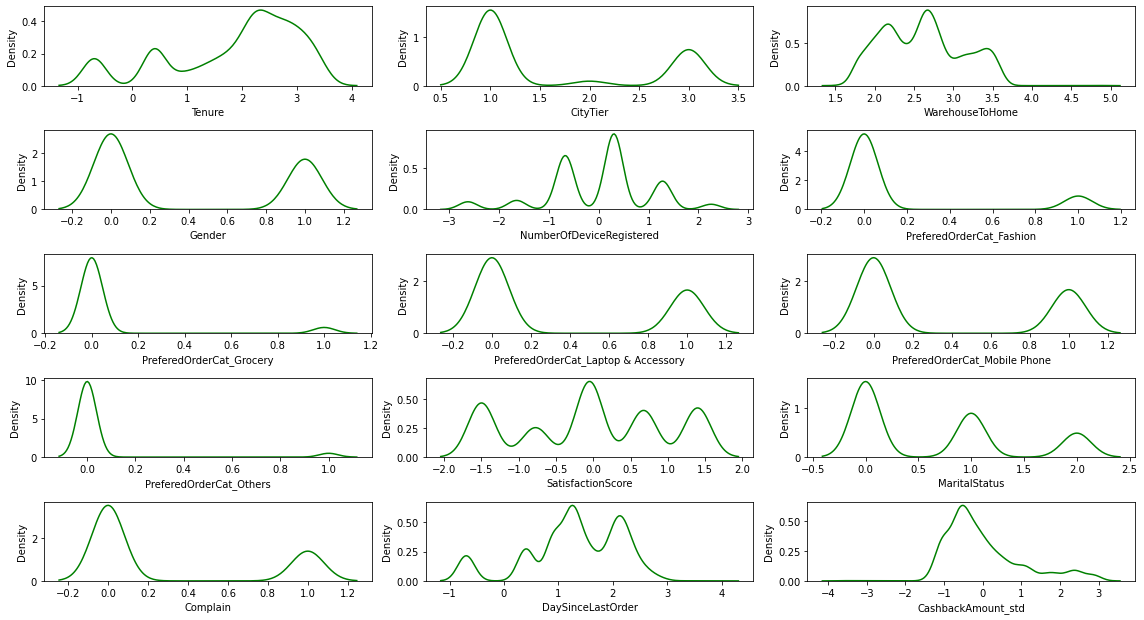

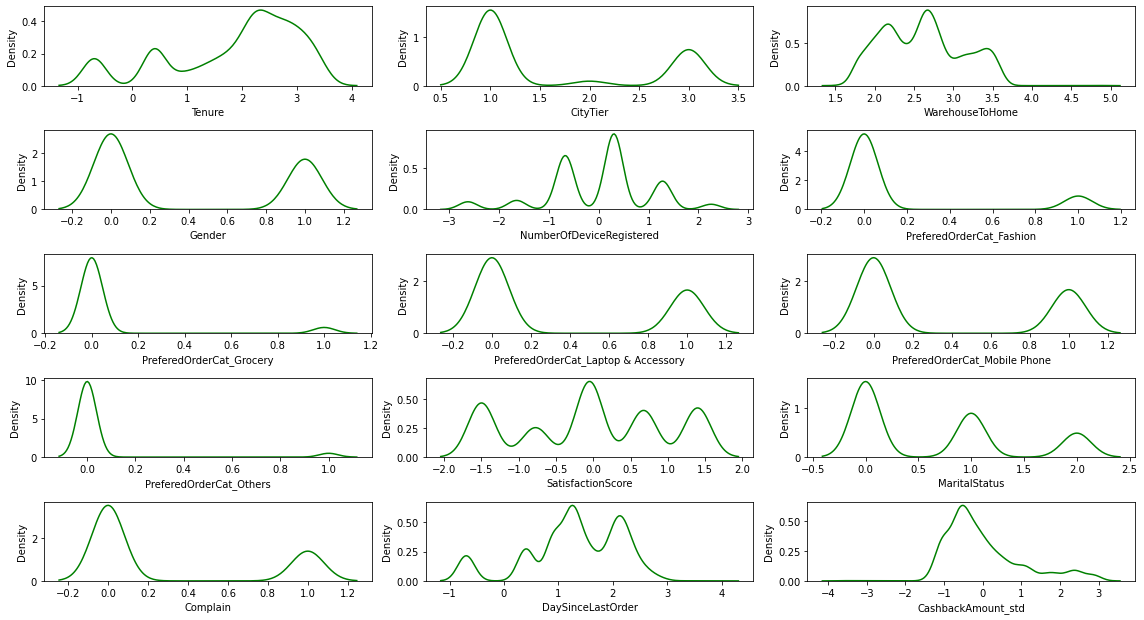

In [43]:
#distribusi nilai asli
c = [Xtrain,Xtest]
for i in c:
    features = ['Tenure','CityTier','WarehouseToHome','Gender','NumberOfDeviceRegistered','PreferedOrderCat_Fashion','PreferedOrderCat_Grocery',
        'PreferedOrderCat_Laptop & Accessory','PreferedOrderCat_Mobile Phone','PreferedOrderCat_Others','SatisfactionScore','MaritalStatus',
        'Complain','DaySinceLastOrder','CashbackAmount_std']
    plt.figure(figsize=(16, 10))
    for i in range(0, len(features)):
        plt.subplot(6, 3, i+1)
        sns.kdeplot(x=df[features[i]], color='green')
        plt.xlabel(features[i])
        plt.tight_layout()

In [44]:
Xtrain.shape

(5872, 25)

In [45]:
ytrain.shape

(5872,)

In [46]:
Xtest.shape

(1519, 25)

In [47]:
ytest.shape

(1519, 1)

# kNN

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

def eval_classification(model):
    y_pred = model.predict(Xtest)
    y_pred_train = model.predict(Xtrain)
    y_pred_proba = model.predict_proba(Xtest)
    y_pred_proba_train = model.predict_proba(Xtrain)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(ytrain, y_pred_train))
    
    print("Precision (Test Set): %.2f" % precision_score(ytest, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(ytrain, y_pred_train))
    
    print("Recall (Test Set): %.2f" % recall_score(ytest, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(ytrain, y_pred_train))
    
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(ytrain, y_pred_train))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(ytrain, y_pred_proba_train[:, 1]))
    
    print(confusion_matrix(ytest, y_pred))
#     print("AUC (test-label): %.2f" % roc_auc_score(ytest, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(ytrain, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [49]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(Xtrain, ytrain)

y_pred = neigh.predict(Xtest)
eval_classification(neigh)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.94
Precision (Test Set): 0.50
Precision (Train Set): 0.90
Recall (Test Set): 0.82
Recall (Train Set): 1.00
F1-Score (Test Set): 0.62
F1-Score (Train Set): 0.95
AUC (test-proba): 0.90
AUC (train-proba): 1.00
[[1095  193]
 [  41  190]]


## Hyperparameter Tuning with RandomSearch

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

# List of hyperparameter
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
modelknn = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=123, scoring='recall')

# Fit Model & Evaluasi
modelknn.fit(Xtrain, ytrain)
y_pred = modelknn.predict(Xtest)
eval_classification(modelknn)

Accuracy (Test Set): 0.82
Accuracy (Train Set): 0.92
Precision (Test Set): 0.46
Precision (Train Set): 0.87
Recall (Test Set): 0.84
Recall (Train Set): 1.00
F1-Score (Test Set): 0.59
F1-Score (Train Set): 0.93
AUC (test-proba): 0.90
AUC (train-proba): 0.99
[[1058  230]
 [  37  194]]


In [51]:
print('Best leaf_size:', modelknn.best_estimator_.get_params()['leaf_size'])
print('Best n_neighbors:', modelknn.best_estimator_.get_params()['n_neighbors'])
print('Best p:', modelknn.best_estimator_.get_params()['p'])
print('Best algorithm:', modelknn.best_estimator_.get_params()['algorithm'])

Best leaf_size: 30
Best n_neighbors: 9
Best p: 2
Best algorithm: kd_tree


In [52]:
modelknn.best_estimator_.get_params()

{'algorithm': 'kd_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 9,
 'p': 2,
 'weights': 'uniform'}

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=123)
lr.fit(Xtrain, ytrain)
eval_classification(lr) 

Accuracy (Test Set): 0.84
Accuracy (Train Set): 0.86
Precision (Test Set): 0.48
Precision (Train Set): 0.86
Recall (Test Set): 0.77
Recall (Train Set): 0.85
F1-Score (Test Set): 0.59
F1-Score (Train Set): 0.85
AUC (test-proba): 0.89
AUC (train-proba): 0.93
[[1092  196]
 [  53  178]]


In [54]:
# tune hyperparam
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.01, 1, num = 30)]
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
hyperparams = dict(penalty=penalty, C=C, solver=solver)

lr = LogisticRegression(random_state=123)
gs = RandomizedSearchCV(lr, hyperparams, cv=5, scoring='recall')
gs.fit(Xtrain, ytrain)
eval_classification(gs)

Accuracy (Test Set): 0.84
Accuracy (Train Set): 0.86
Precision (Test Set): 0.47
Precision (Train Set): 0.86
Recall (Test Set): 0.77
Recall (Train Set): 0.85
F1-Score (Test Set): 0.59
F1-Score (Train Set): 0.85
AUC (test-proba): 0.89
AUC (train-proba): 0.93
[[1091  197]
 [  53  178]]


# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=123)
model.fit(Xtrain, ytrain)

y_pred = model.predict(Xtest)
eval_classification(model)

Accuracy (Test Set): 0.91
Accuracy (Train Set): 1.00
Precision (Test Set): 0.68
Precision (Train Set): 1.00
Recall (Test Set): 0.77
Recall (Train Set): 1.00
F1-Score (Test Set): 0.73
F1-Score (Train Set): 1.00
AUC (test-proba): 0.86
AUC (train-proba): 1.00
[[1205   83]
 [  52  179]]


In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 150, num = 30)] 
min_samples_split = [10, 100]
min_samples_leaf = [2, 4, 10]
max_features = ['auto', 'sqrt'] 
ccp_alpha =[0.0]

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       ccp_alpha=ccp_alpha
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=123)
dt = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=123, scoring='recall')
dt.fit(Xtrain, ytrain)
# Predict & Evaluation
y_pred = dt.predict(Xtest)
eval_classification(dt)

Accuracy (Test Set): 0.84
Accuracy (Train Set): 0.94
Precision (Test Set): 0.47
Precision (Train Set): 0.94
Recall (Test Set): 0.57
Recall (Train Set): 0.93
F1-Score (Test Set): 0.52
F1-Score (Train Set): 0.94
AUC (test-proba): 0.83
AUC (train-proba): 0.99
[[1143  145]
 [ 100  131]]


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=123)
rf.fit(Xtrain,ytrain)
eval_classification(rf)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 1.00
Precision (Test Set): 0.85
Precision (Train Set): 1.00
Recall (Test Set): 0.80
Recall (Train Set): 1.00
F1-Score (Test Set): 0.82
F1-Score (Train Set): 1.00
AUC (test-proba): 0.97
AUC (train-proba): 1.00
[[1255   33]
 [  47  184]]


<b>Hyperparameter yang biasa di tuning pada Random Forest:</b> (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html'>Dokumentasi Sklearn Random Forest</a>)
- n_estimators: jumlah subtree yang akan dibangun
- max_samples: Jumlah maksimal sampel pada masing-masing training subset (setelah proses bootstrap)

Sisa hyperparameter lainnya sama dengan Decision Tree, yaitu:
- criterion: cara menghitung impurity pada feature (gini, entropy). melihat feature mana yang menjadi root/node
- max_depth: maksimal kedalaman tree untuk mencegah overfitting
- min_sample_split: berapa jumlah sample yg dibutuhkan pada node untuk membuat leaf baru (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
- min_sample_leaf: berapa jumlah sample yg dibutuhkan pada leaf agar leaf terbentuk (agar tidak terlalu sedikit sehingga mengakibatkan overfit)
- ccp_alpha: jika cost/error dari sebuah leaf/subtree lebih besar daripada ccp_alpha, subtree tersebut akan kita hapus/prune sehingga meminimalisir error/variance dari model

In [58]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import numpy as np

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=123)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, scoring='recall')
rf_tuned.fit(Xtrain, ytrain)

# Predict & Evaluation
eval_classification(rf_tuned)

Accuracy (Test Set): 0.95
Accuracy (Train Set): 1.00
Precision (Test Set): 0.84
Precision (Train Set): 1.00
Recall (Test Set): 0.82
Recall (Train Set): 1.00
F1-Score (Test Set): 0.83
F1-Score (Train Set): 1.00
AUC (test-proba): 0.97
AUC (train-proba): 1.00
[[1251   37]
 [  41  190]]


In [59]:
rf_tuned.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 74,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

# XGBoost

In [60]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=123)
xg.fit(Xtrain, ytrain)

y_pred = xg.predict(Xtest)
eval_classification(xg)

[23:36:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.95
Accuracy (Train Set): 1.00
Precision (Test Set): 0.87
Precision (Train Set): 1.00
Recall (Test Set): 0.81
Recall (Train Set): 1.00
F1-Score (Test Set): 0.84
F1-Score (Train Set): 1.00
AUC (test-proba): 0.98
AUC (train-proba): 1.00
[[1261   27]
 [  43  188]]


In [61]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
 'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }
# Init
xg = XGBClassifier(random_state=123)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=123, scoring='recall')
xg_tuned.fit(Xtrain,ytrain)

# Predict & Evaluation
eval_classification(xg_tuned)

[23:36:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

# Adaboost

In [62]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=123)
ab.fit(Xtrain,ytrain)

eval_classification(ab)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.89
Precision (Test Set): 0.50
Precision (Train Set): 0.88
Recall (Test Set): 0.69
Recall (Train Set): 0.89
F1-Score (Test Set): 0.58
F1-Score (Train Set): 0.89
AUC (test-proba): 0.89
AUC (train-proba): 0.96
[[1127  161]
 [  71  160]]


In [63]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=123)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=123, cv=5, scoring='recall')
ab_tuned.fit(Xtrain,ytrain)

# Predict & Evaluation
eval_classification(ab_tuned)

Accuracy (Test Set): 0.87
Accuracy (Train Set): 0.92
Precision (Test Set): 0.57
Precision (Train Set): 0.92
Recall (Test Set): 0.69
Recall (Train Set): 0.92
F1-Score (Test Set): 0.63
F1-Score (Train Set): 0.92
AUC (test-proba): 0.90
AUC (train-proba): 0.97
[[1168  120]
 [  71  160]]


# Feature Importance

Text(0.5, 1.0, 'feature importance score')

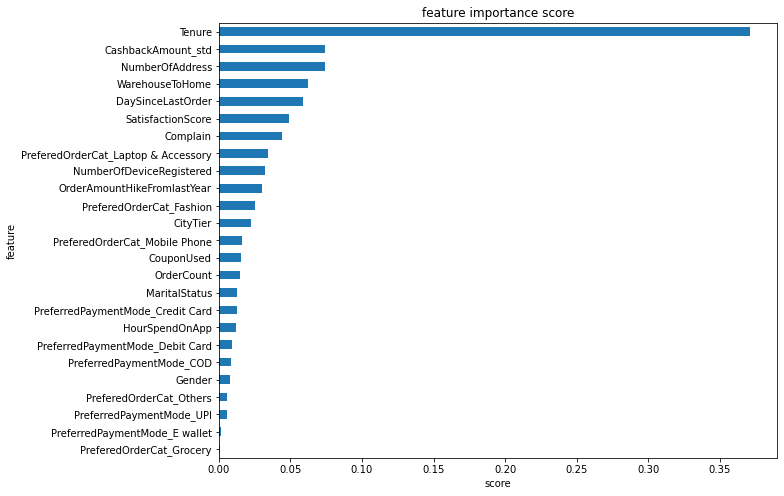

In [64]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(Xtrain, ytrain) # fit model decision tree dari data train
dt.feature_importances_
# plt.figsize(10, 8)
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

Text(0.5, 1.0, 'feature importance score random forest')

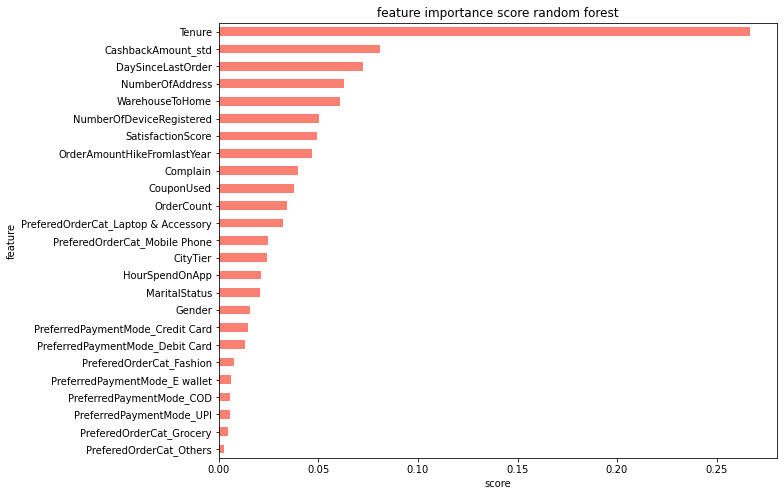

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=123)
rf.fit(Xtrain,ytrain)
rf.feature_importances_
# plt.figsize(10, 8)
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8), color='salmon')
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score random forest')

In [67]:
Xtrains = Xtrain.drop(columns=['Gender','PreferedOrderCat_Fashion','PreferedOrderCat_Grocery' ,'PreferedOrderCat_Mobile Phone','PreferedOrderCat_Others', 'CityTier'])
Xtests = Xtest.drop(columns=['Gender','PreferedOrderCat_Fashion','PreferedOrderCat_Grocery','PreferedOrderCat_Mobile Phone','PreferedOrderCat_Others', 'CityTier'])
ytrains = ytrain
ytests = ytest

In [68]:
Xtrains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tenure                               5872 non-null   float64
 1   WarehouseToHome                      5872 non-null   float64
 2   NumberOfDeviceRegistered             5872 non-null   float64
 3   SatisfactionScore                    5872 non-null   float64
 4   Complain                             5872 non-null   int64  
 5   DaySinceLastOrder                    5872 non-null   float64
 6   CashbackAmount_std                   5872 non-null   float64
 7   HourSpendOnApp                       5872 non-null   float64
 8   NumberOfAddress                      5872 non-null   float64
 9   OrderAmountHikeFromlastYear          5872 non-null   float64
 10  CouponUsed                           5872 non-null   float64
 11  OrderCount                    

In [69]:
Xtrains.shape

(5872, 19)

In [70]:
ytrains.shape

(5872,)

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

def eval_classification(model):
    y_pred = model.predict(Xtests)
    y_pred_train = model.predict(Xtrains)
    y_pred_proba = model.predict_proba(Xtests)
    y_pred_proba_train = model.predict_proba(Xtrains)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytests, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(ytrains, y_pred_train))
    
    print("Precision (Test Set): %.2f" % precision_score(ytests, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(ytrains, y_pred_train))
    
    print("Recall (Test Set): %.2f" % recall_score(ytests, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(ytrains, y_pred_train))
    
    print("F1-Score (Test Set): %.2f" % f1_score(ytests, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(ytrains, y_pred_train))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(ytests, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(ytrains, y_pred_proba_train[:, 1]))
    
    print("Confusion Matrix):", confusion_matrix(ytests, y_pred))
#     print("AUC (test-label): %.2f" % roc_auc_score(ytest, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(ytrain, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [72]:
from sklearn.linear_model import LogisticRegression
lrs = LogisticRegression(random_state=123)
lrs.fit(Xtrains, ytrains)
eval_classification(lrs) 

Accuracy (Test Set): 0.83
Accuracy (Train Set): 0.84
Precision (Test Set): 0.47
Precision (Train Set): 0.85
Recall (Test Set): 0.77
Recall (Train Set): 0.83
F1-Score (Test Set): 0.58
F1-Score (Train Set): 0.84
AUC (test-proba): 0.88
AUC (train-proba): 0.92
Confusion Matrix): [[1085  203]
 [  54  177]]


In [73]:
# tune hyperparam
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.001, 1, num = 30)]
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
hyperparams = dict(penalty=penalty, C=C, solver=solver)

lrs = LogisticRegression()
gss = RandomizedSearchCV(lrs, hyperparams, cv=5, scoring='roc_auc')
gss.fit(Xtrains, ytrains)
eval_classification(gss)

Accuracy (Test Set): 0.83
Accuracy (Train Set): 0.84
Precision (Test Set): 0.47
Precision (Train Set): 0.85
Recall (Test Set): 0.77
Recall (Train Set): 0.83
F1-Score (Test Set): 0.58
F1-Score (Train Set): 0.84
AUC (test-proba): 0.88
AUC (train-proba): 0.91
Confusion Matrix): [[1085  203]
 [  54  177]]


Text(0.5, 1.0, 'feature importance score')

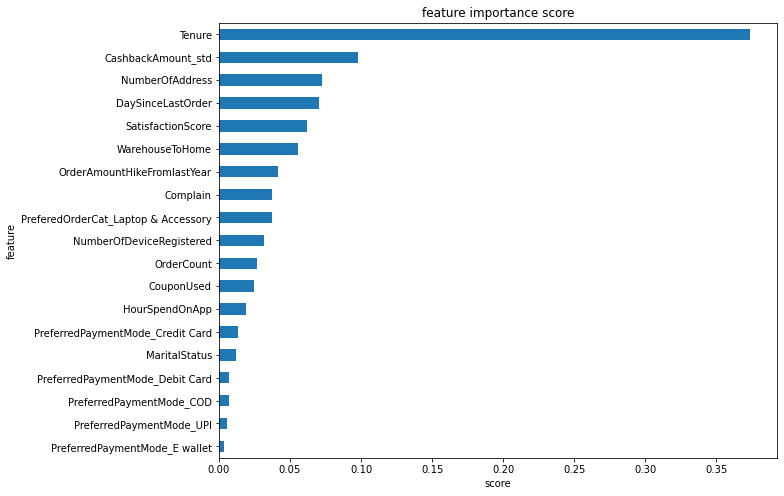

In [74]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier() # inisiasi object dengan nama dt
dt.fit(Xtrains, ytrains) # fit model decision tree dari data train
dt.feature_importances_
# plt.figsize(10, 8)
feat_importances = pd.Series(dt.feature_importances_, index=Xtests.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

# Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=123)
rf.fit(Xtrains,ytrains)
eval_classification(rf)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Precision (Test Set): 0.80
Precision (Train Set): 1.00
Recall (Test Set): 0.78
Recall (Train Set): 1.00
F1-Score (Test Set): 0.79
F1-Score (Train Set): 1.00
AUC (test-proba): 0.96
AUC (train-proba): 1.00
Confusion Matrix): [[1244   44]
 [  50  181]]


In [76]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import numpy as np

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 150, stop = 500, num = 50)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=123)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(Xtrains, ytrains)

# Predict & Evaluation
eval_classification(rf_tuned)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 1.00
Precision (Test Set): 0.81
Precision (Train Set): 1.00
Recall (Test Set): 0.80
Recall (Train Set): 1.00
F1-Score (Test Set): 0.81
F1-Score (Train Set): 1.00
AUC (test-proba): 0.97
AUC (train-proba): 1.00
Confusion Matrix): [[1245   43]
 [  46  185]]


# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=123)
model.fit(Xtrains, ytrains)

y_pred = model.predict(Xtests)
eval_classification(model)

Accuracy (Test Set): 0.90
Accuracy (Train Set): 1.00
Precision (Test Set): 0.64
Precision (Train Set): 1.00
Recall (Test Set): 0.74
Recall (Train Set): 1.00
F1-Score (Test Set): 0.69
F1-Score (Train Set): 1.00
AUC (test-proba): 0.83
AUC (train-proba): 1.00
Confusion Matrix): [[1194   94]
 [  61  170]]


In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 150, num = 30)] 
min_samples_split = [10, 100]
min_samples_leaf = [2, 4, 10]
max_features = ['auto', 'sqrt'] 
ccp_alpha =[0.0]

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       ccp_alpha=ccp_alpha
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=123)
dt = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=123, scoring='recall')
dt.fit(Xtrains, ytrains)
# Predict & Evaluation
y_pred = dt.predict(Xtests)
eval_classification(dt)

Accuracy (Test Set): 0.85
Accuracy (Train Set): 0.95
Precision (Test Set): 0.51
Precision (Train Set): 0.97
Recall (Test Set): 0.57
Recall (Train Set): 0.94
F1-Score (Test Set): 0.54
F1-Score (Train Set): 0.95
AUC (test-proba): 0.85
AUC (train-proba): 0.99
Confusion Matrix): [[1163  125]
 [ 100  131]]
